In [1]:
import pandas as pd
import numpy as np


In [2]:
import os
os.chdir('../')

In [3]:
df=pd.read_csv('data\\data.csv')
df.head()

,Unnamed: 0,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,1,38,Private,HS-grad,Divorced,Handlers-cleaners,single,White,Male,40,United-States,<=50K
2,2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [4]:
df.isna().sum()

Unnamed: 0       0
age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,single,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [6]:
x_res=df.select_dtypes(include='object')
x_res

,workclass,education,matrial,occupation,relationship,race,sex,country,salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,single,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [7]:
df.isnull().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

# Convert categorical variables to numerical 

In [8]:
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [9]:
for i,col in enumerate(x_res):
	le=LabelEncoder()

	df[col]=le.fit_transform(x_res[col])

In [10]:
df

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,5,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
3,28,3,9,2,9,3,2,0,40,4,0
4,37,3,12,2,3,3,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,2,12,3,4,0,38,38,0
32556,40,3,11,2,6,0,4,1,40,38,1
32557,58,3,11,6,0,2,4,0,40,38,0
32558,22,3,11,4,0,1,4,1,20,38,0


In [11]:
df.isna().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

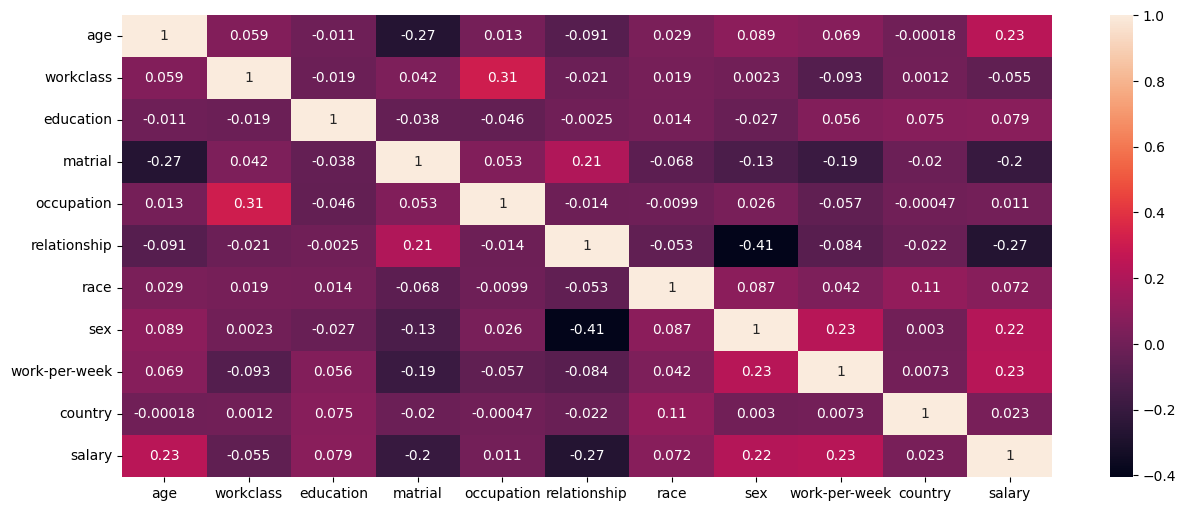

In [11]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

# Outliers handling

<Axes: >

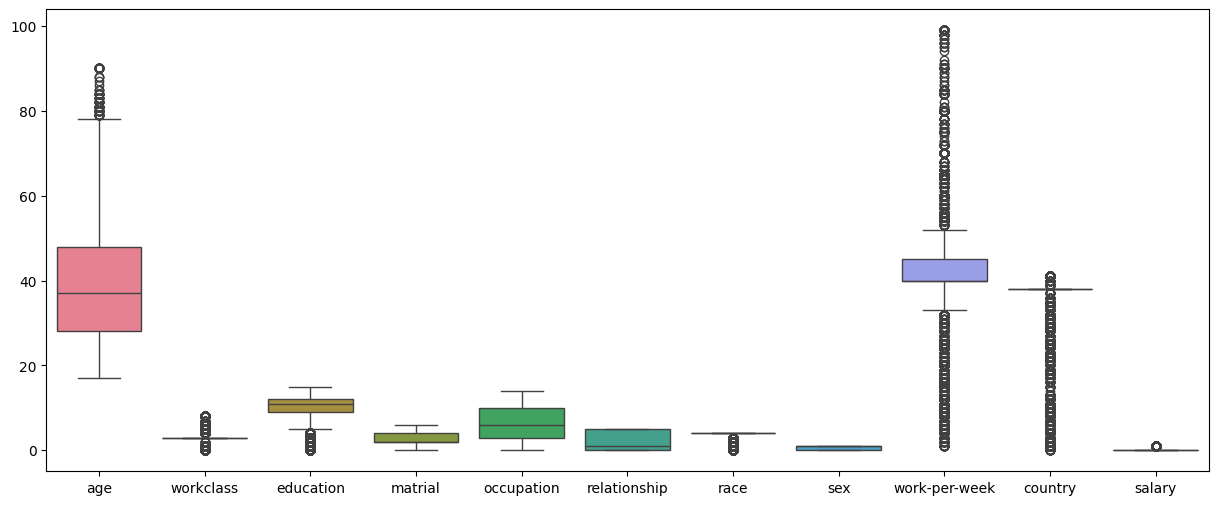

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(df)

In [12]:
df_copy=df.copy()
df_copy.shape

(32560, 11)

In [13]:
def remove_outliers(col):
    Q1=df_copy[col].quantile(0.25)
    Q3=df_copy[col].quantile(0.75)
    IQR=Q3-Q1
    upper_fence=Q3+1.5*(IQR)
    lower_fence=Q1- 1.5*(IQR)
    df_copy.loc[(df[col]>upper_fence),col]
    df_copy.loc[(df[col]<lower_fence),col]
    return df_copy

In [14]:
for col in df_copy.columns:
    remove_outliers(col)

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df)
plt.subplot(1,2,2)
sns.boxplot(df_copy)
plt.xticks(rotation=45)

NameError: name 'plt' is not defined

In [17]:
def remove_outliers(df, threshold=3):

   
    z_scores = np.abs((df - df.mean()) / df.std())
    
   
    filtered_df = df[(z_scores < threshold).all(axis=1)]
    
    return filtered_df

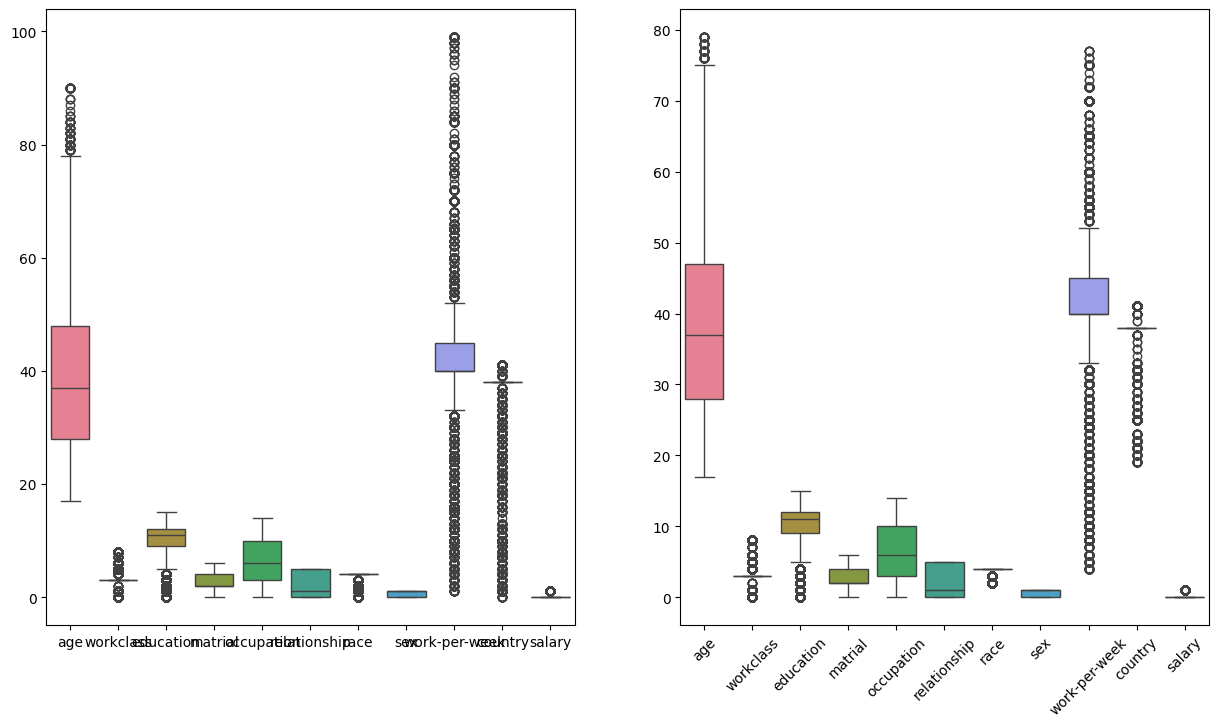

In [18]:
df_copy = remove_outliers(df_copy)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(df)
plt.subplot(1,2,2)
sns.boxplot(df_copy)
plt.xticks(rotation=45)
plt.show()

In [16]:
df_copy.head()

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,5,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
3,28,3,9,2,9,3,2,0,40,4,0
4,37,3,12,2,3,3,4,0,40,38,0


In [17]:
df_copy.isna().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
def split_data(x,y):
   x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=42)
   sc=StandardScaler()
   x_train=sc.fit_transform(x_train)
   x_test=sc.transform(x_test)
   return x_train,x_test,y_train,y_test

In [18]:
x=df_copy.iloc[:,:-1]
y=df_copy['salary']

In [23]:
x_train,x_test,y_train,y_test=split_data(x,y)

In [24]:
x_train.shape

(21148, 10)

In [25]:
y_train

4541     0
12067    0
25725    0
19786    0
13694    1
        ..
23573    0
5893     0
932      0
17240    1
25841    0
Name: salary, Length: 21148, dtype: int64

<Axes: xlabel='salary'>

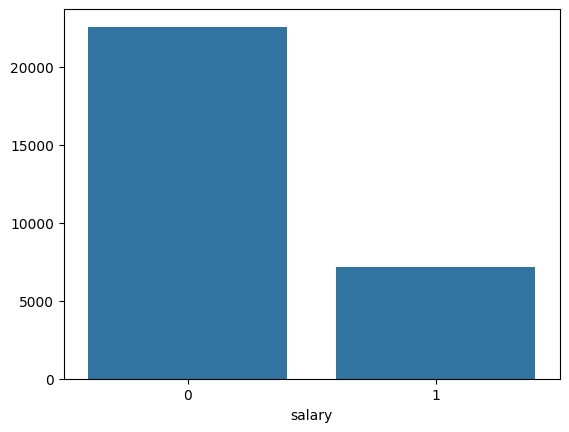

In [26]:
sns.barplot(x=df_copy['salary'].value_counts().index, y=df_copy['salary'].value_counts().values)

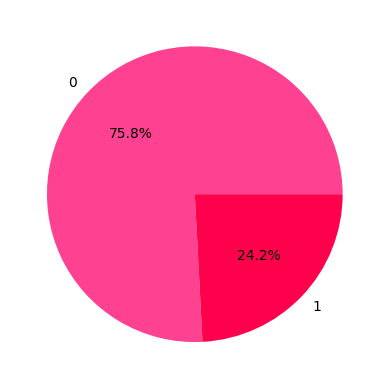

In [27]:
plt.pie(df_copy['salary'].value_counts(),autopct='%1.1f%%',colors=['#FF4191','#FF004D'],labels=df_copy['salary'].unique())
plt.show()

## obesrvation
target varible totaly imblnce data

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
def model_evaluatuion(x_train,y_train,x_test,y_test,models):

        
            report={}
            for i in range(len(models)):
                model = list(models.values())[i]
               
                print(f"Training {model}...")

                # Train model
                model.fit(x_train,y_train)

                # Predict Testing data
                y_test_pred =model.predict(x_test)

                
                test_model_score = accuracy_score(y_test,y_test_pred)*100
                cof=confusion_matrix(y_test,y_test_pred)

                report[list(models.keys())[i]] = f' test score {test_model_score}  cof {print(cof)}'


            return report

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [31]:
models={
                'LogisticRegression':LogisticRegression(),
                'KNeighborsClassifier': KNeighborsClassifier(),
                'DesisionTree':DecisionTreeClassifier(),
                'RandomForest':RandomForestClassifier(),
                'BaggingClf':BaggingClassifier(),
                'Xgboost':XGBClassifier()
            }

In [32]:
model_evaluatuion(x_train,y_train,x_test,y_test,models)

Training LogisticRegression()...
[[6070  448]
 [1494  627]]
Training KNeighborsClassifier()...
[[5844  674]
 [ 958 1163]]
Training DecisionTreeClassifier()...
[[5629  889]
 [1027 1094]]
Training RandomForestClassifier()...
[[5908  610]
 [ 966 1155]]
Training BaggingClassifier()...
[[5839  679]
 [ 994 1127]]
Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None,

{'LogisticRegression': ' test score 77.52054635953235  cof None',
 'KNeighborsClassifier': ' test score 81.10892464405602  cof None',
 'DesisionTree': ' test score 77.8215071188795  cof None',
 'RandomForest': ' test score 81.7571478180345  cof None',
 'BaggingClf': ' test score 80.63433267739322  cof None',
 'Xgboost': ' test score 83.79442065053826  cof None'}

## Smote

In [33]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm=SMOTE(random_state=42)
x_re,y_re=sm.fit_resample(x,y)

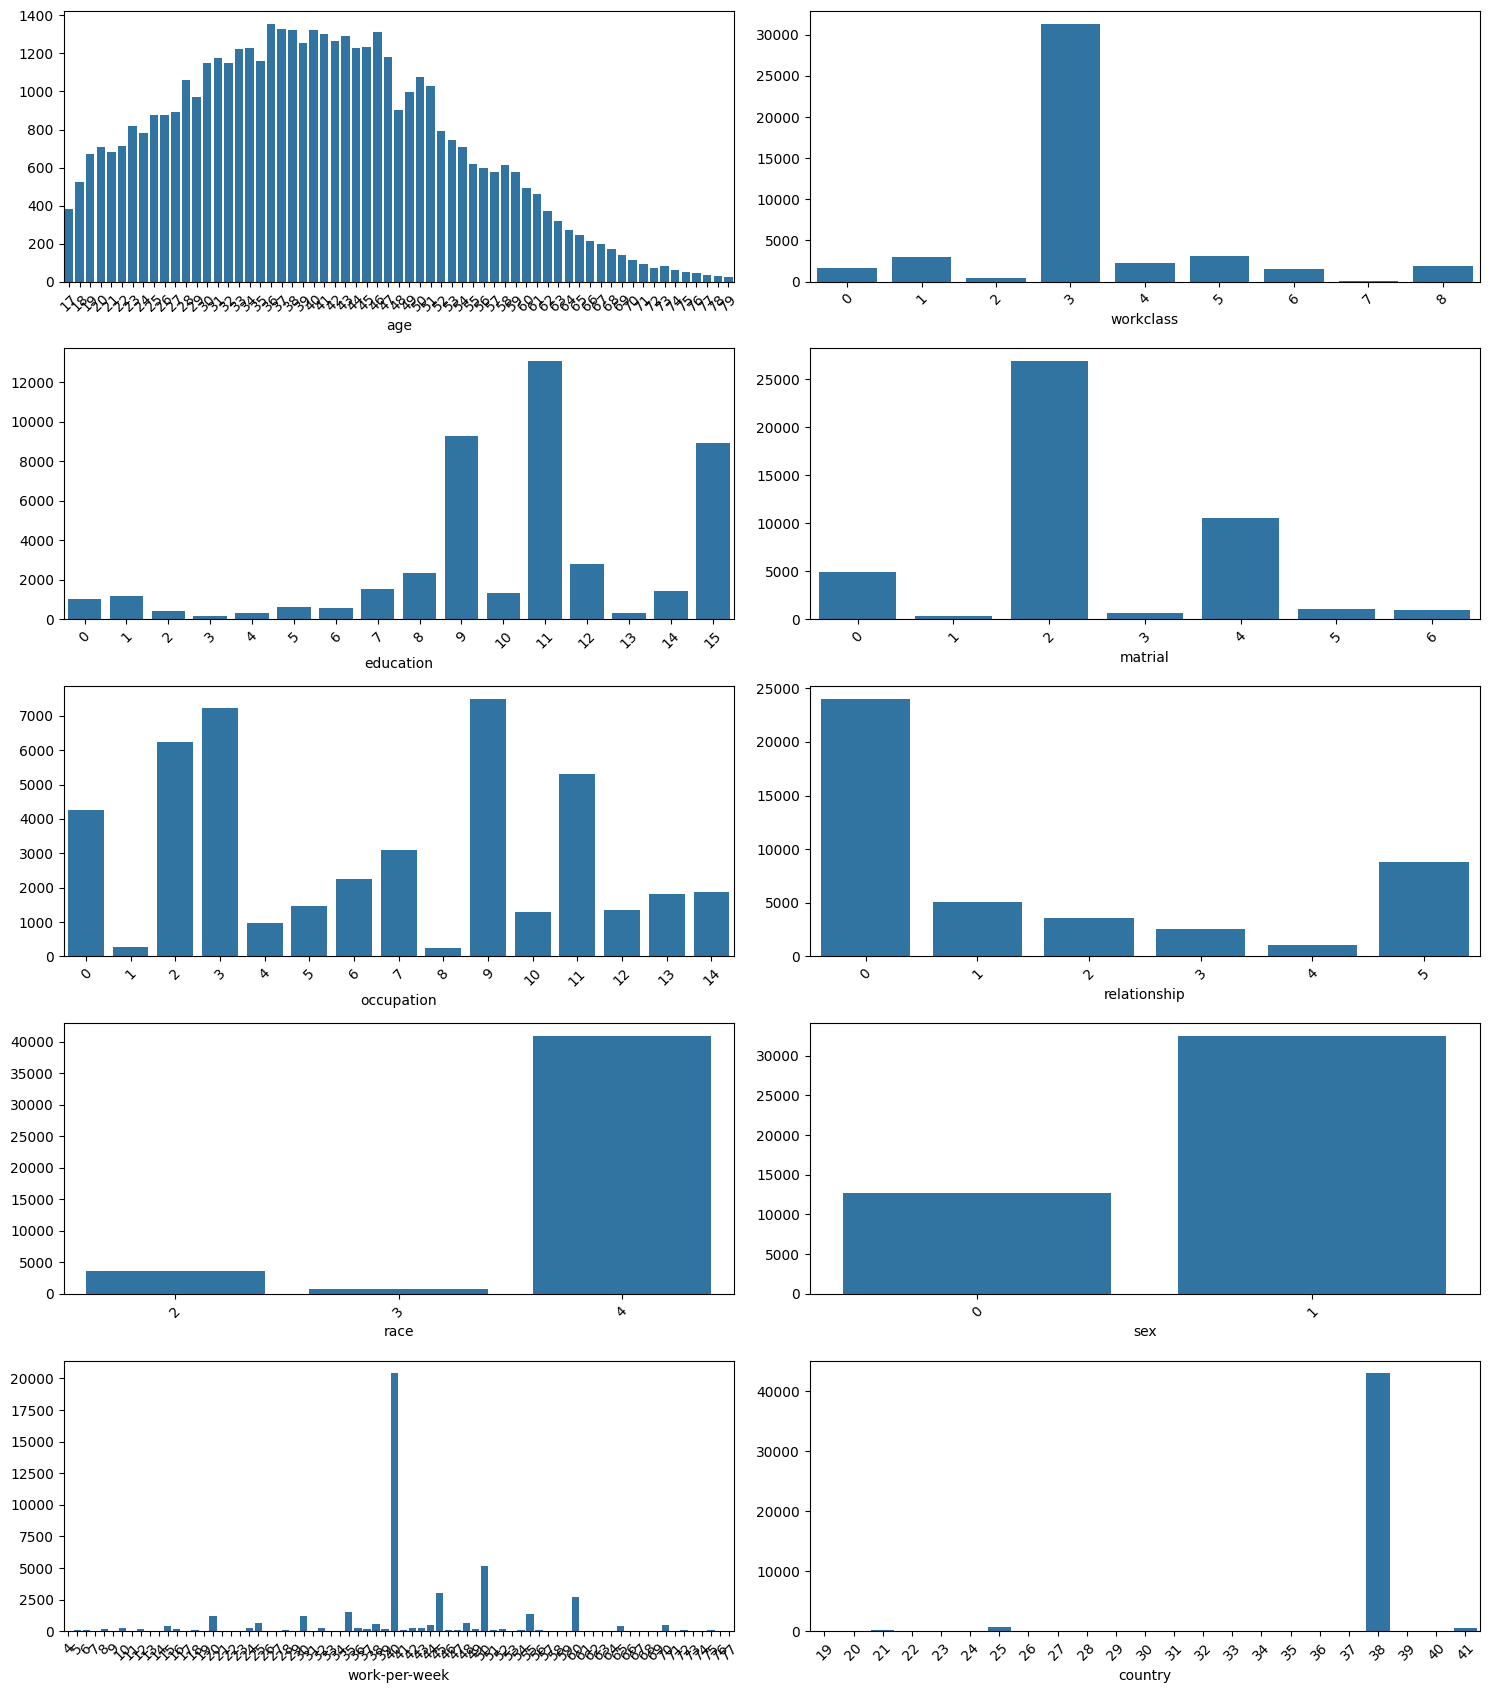

In [36]:
plt.figure(figsize=(15,30))
for i,col in enumerate(x_re):
    plt.subplot(9,2,i+1)
    sns.barplot(x=x_re[col].value_counts().index, y=x_re[col].value_counts().values)
    plt.xticks(rotation=45)
   
plt.tight_layout()
plt.show()

In [22]:
y_re.value_counts()

salary
0    24719
1    24719
Name: count, dtype: int64

In [23]:
x_re.shape

(49438, 10)

In [39]:
x_train,x_test,y_train,y_test=split_data(x_re,y_re)

In [40]:
y_train

25145    0
16987    0
18673    0
42559    1
11513    0
        ..
11284    0
44732    1
38158    1
860      0
15795    1
Name: salary, Length: 32074, dtype: int64

In [41]:
model_evaluatuion(x_train,y_train,x_test,y_test,models)

Training LogisticRegression()...
[[4504 2041]
 [1428 5129]]
Training KNeighborsClassifier()...
[[5139 1406]
 [ 829 5728]]
Training DecisionTreeClassifier()...
[[5318 1227]
 [1072 5485]]
Training RandomForestClassifier()...
[[5479 1066]
 [ 715 5842]]
Training BaggingClassifier()...
[[5484 1061]
 [ 903 5654]]
Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None,

{'LogisticRegression': ' test score 73.52312624026867  cof None',
 'KNeighborsClassifier': ' test score 82.94153564341322  cof None',
 'DesisionTree': ' test score 82.45306060143488  cof None',
 'RandomForest': ' test score 86.40665547244696  cof None',
 'BaggingClf': ' test score 85.00992214929019  cof None',
 'Xgboost': ' test score 85.27705693787208  cof None'}

# Ensmble Technique

In [42]:
from sklearn.svm import SVC

In [43]:
models=[
    ('LogisticRegression',LogisticRegression()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('XGBClassifier',XGBClassifier()),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('RandomForestClassifier',RandomForestClassifier())
]

In [44]:
# for name, clf in models:
#     model=BaggingClassifier(estimator=clf,n_estimators=50,random_state=45)
#     model.fit(x_train,y_train)
#     y_pred=model.predict(x_test)
    
#     acc=accuracy_score(y_test,y_pred)
    
#     print(f'{model} accuracy {acc}')
#     print('============================================')

In [28]:
x_re.isnull().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
dtype: int64

In [29]:
x_re['salary']=y_re

In [30]:
x_re

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,5,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
3,28,3,9,2,9,3,2,0,40,4,0
4,37,3,12,2,3,3,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...
49433,43,3,9,4,9,5,4,1,45,38,1
49434,44,4,15,2,3,0,4,1,50,38,1
49435,40,1,11,2,9,3,4,0,40,38,1
49436,40,4,8,2,3,0,4,1,40,38,1


In [32]:
x_re.shape

(49438, 11)

In [33]:
x_re.isna().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [35]:
x_re.to_csv('data/clean-data.csv')

## Cluster

In [55]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [58]:
wcss=[]
for i in range(1,12):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(x_train)
    wcss.append(km.inertia_)

In [59]:
kn=KneeLocator(range(1,12),wcss,curve='convex',direction='decreasing')

In [60]:
kn.elbow

np.int64(7)

In [68]:
kn=KMeans(n_clusters=7)
kn.fit(x_train)
y_label=kn.predict(x_train)

In [69]:
y_label

array([6, 2, 1, ..., 1, 0, 1], dtype=int32)

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(x_train,y_label)

np.float64(0.1781032865331361)